### 1st goal Minimize categorical features and max numerical...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# cleaned data to use:

df= pd.read_csv("/content/updated_cosmo_chemicals.csv")
print(df.head())

   CSF   CasNumber InitialDateReported MostRecentDateReported  \
0  NaN  13463-67-7          2009-06-17             08/28/2013   
1  NaN  65996-92-1          2009-07-01             07/01/2009   
2  NaN    140-67-0          2009-07-01             07/01/2009   
3  NaN  13463-67-7          2009-07-09             08/28/2013   
4  NaN  13463-67-7          2009-07-09             08/28/2013   

  DiscontinuedDate ChemicalCreatedAt ChemicalUpdatedAt ChemicalDateRemoved  \
0       2011-02-01        2009-07-09        07/09/2009                 NaN   
1              NaN        2009-07-01        07/01/2009                 NaN   
2              NaN        2009-07-02        07/02/2009                 NaN   
3              NaN        2009-07-09        07/09/2009                 NaN   
4       2011-02-01        2009-07-09        07/09/2009                 NaN   

   ChemicalCount                                       ProductName  ...  \
0              1  ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADE

Reformulated
0    111650
1      2985
Name: count, dtype: int64
Reformulated Percentage: 2.60%


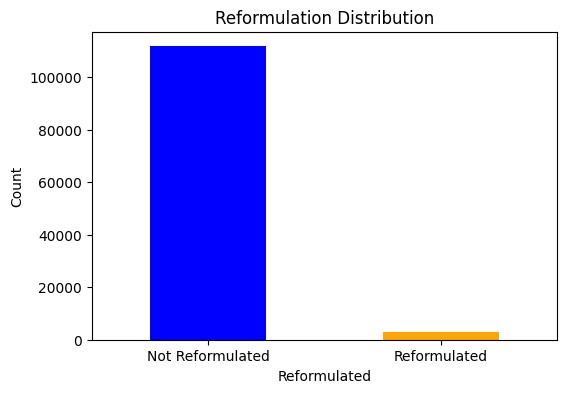

In [3]:
import matplotlib.pyplot as plt

# Create binary reformulated column
df['Reformulated'] = df['ChemicalDateRemoved'].notna().astype(int)

# Count occurrences
reformulated_counts = df['Reformulated'].value_counts()

print(reformulated_counts)
print(f"Reformulated Percentage: {reformulated_counts[1] / reformulated_counts.sum() * 100:.2f}%")

plt.figure(figsize=(6,4))
reformulated_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xticks(ticks=[0,1], labels=['Not Reformulated', 'Reformulated'], rotation=0)
plt.ylabel('Count')
plt.title('Reformulation Distribution')
plt.show()


HazardType
Not Hazardous            102203
Potentially Hazardous      4146
Confirmed Carcinogen       2979
Not Specified               668
Suspected Carcinogen        401
Reproductive Toxicant       103
Name: count, dtype: int64


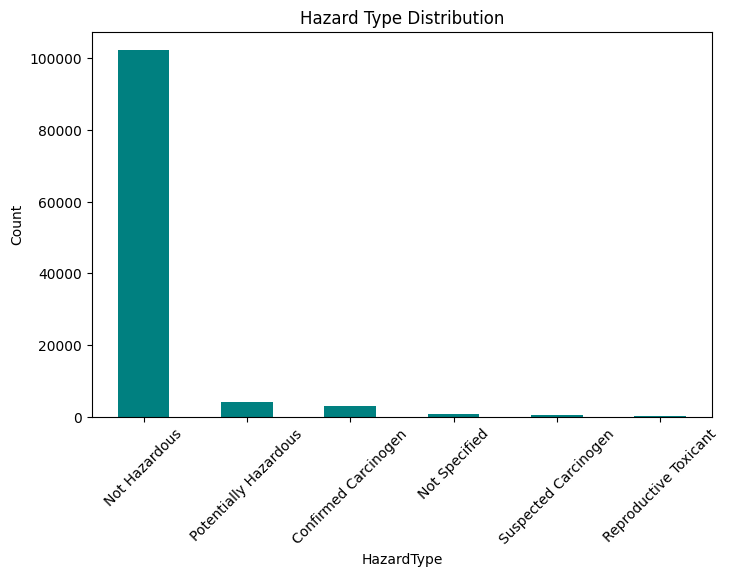

In [4]:
# Count occurrences
hazard_counts = df['HazardType'].value_counts()

# Print the distribution
print(hazard_counts)

# Plot
plt.figure(figsize=(8,5))
hazard_counts.plot(kind='bar', color='teal')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Hazard Type Distribution')
plt.show()


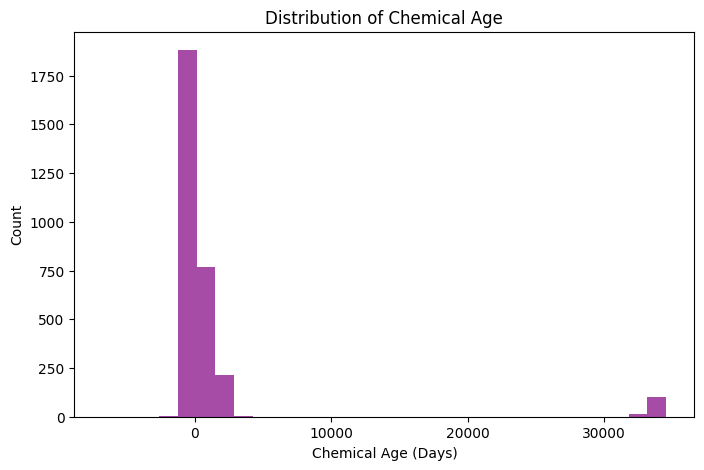

In [5]:
# Convert date columns to datetime if not already done
df['ChemicalDateRemoved'] = pd.to_datetime(df['ChemicalDateRemoved'])
df['InitialDateReported'] = pd.to_datetime(df['InitialDateReported'])

# Calculate ChemicalAge
df['ChemicalAge'] = (df['ChemicalDateRemoved'] - df['InitialDateReported']).dt.days

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(df['ChemicalAge'].dropna(), bins=30, color='purple', alpha=0.7)
plt.xlabel('Chemical Age (Days)')
plt.ylabel('Count')
plt.title('Distribution of Chemical Age')
plt.show()


I think Im going to do binary classification aka reformulated will be my target

In [6]:
df['Reformulated'] = df['ChemicalDateRemoved'].notna().astype(int)

In [7]:
df.head()

,CSF,CasNumber,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,ProductName,...,HazardType,ReformulationCount,ChemicalAge,AverageChemicalAge,ProductLifespan,ChemicalCategoryCount,Efficacy,Safety,Sustainability,Reformulated
0,NaN,13463-67-7,2009-06-17,08/28/2013,2011-02-01,2009-07-09,07/09/2009,NaT,1,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,...,Not Hazardous,0,NaN,5606.0,594,64945,6.0,10,8.0,0
1,NaN,65996-92-1,2009-07-01,07/01/2009,NaN,2009-07-01,07/01/2009,NaT,2,Glover's Medicated Shampoo,...,Confirmed Carcinogen,0,NaN,5613.5,5614,1,4.0,1,3.0,0
2,NaN,140-67-0,2009-07-01,07/01/2009,NaN,2009-07-02,07/02/2009,NaT,2,Glover's Medicated Shampoo,...,Suspected Carcinogen,0,NaN,5613.5,5614,32,5.0,3,6.0,0
3,NaN,13463-67-7,2009-07-09,08/28/2013,NaN,2009-07-09,07/09/2009,NaT,1,PRECISION GLIMMER EYE LINER-ALL SHADES �,...,Not Hazardous,0,NaN,5606.0,5606,64945,6.0,10,8.0,0
4,NaN,13463-67-7,2009-07-09,08/28/2013,2011-02-01,2009-07-09,07/09/2009,NaT,1,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,...,Not Hazardous,0,NaN,5606.0,572,64945,6.0,10,8.0,0


In [8]:
df.to_csv('/content/cosmo_chemical_dataset.csv', index=False)

In [ ]:
column_types = df.dtypes

numeric_cols = column_types[column_types != 'object'].index.tolist()
categorical_cols = column_types[column_types == 'object'].index.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['InitialDateReported', 'ChemicalDateRemoved', 'ChemicalCount', 'ReformulationCount', 'ChemicalAge', 'AverageChemicalAge', 'ProductLifespan', 'ChemicalCategoryCount', 'Efficacy', 'Safety', 'Sustainability', 'Reformulated']
Categorical columns: ['CSF', 'CasNumber', 'MostRecentDateReported', 'DiscontinuedDate', 'ChemicalCreatedAt', 'ChemicalUpdatedAt', 'ProductName', 'CompanyName', 'BrandName', 'PrimaryCategory', 'SubCategory', 'ChemicalName', 'HazardType']


In [ ]:
print(column_types)

CSF                               object
CasNumber                         object
InitialDateReported       datetime64[ns]
MostRecentDateReported            object
DiscontinuedDate                  object
ChemicalCreatedAt                 object
ChemicalUpdatedAt                 object
ChemicalDateRemoved       datetime64[ns]
ChemicalCount                      int64
ProductName                       object
CompanyName                       object
BrandName                         object
PrimaryCategory                   object
SubCategory                       object
ChemicalName                      object
HazardType                        object
ReformulationCount                 int64
ChemicalAge                      float64
AverageChemicalAge               float64
ProductLifespan                    int64
ChemicalCategoryCount              int64
Efficacy                         float64
Safety                             int64
Sustainability                   float64
Reformulated    

The error ValueError: could not convert string to float: '5858-81-1' is happening because there are still non-numeric columns when applying SMOTE. Specifically, some columns like CasNumber are composed of string identifiers that can't be converted to floats directly.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Impute numerical columns with mean
# Numerical columns are those with data types 'float64' or 'int64'
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(f"Numerical columns before imputation: {numerical_cols}")

# SimpleImputer will fill missing values in numerical columns with the mean value of each column
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])


Numerical columns before imputation: ['ChemicalCount', 'ReformulationCount', 'ChemicalAge', 'AverageChemicalAge', 'ProductLifespan', 'ChemicalCategoryCount', 'Efficacy', 'Safety', 'Sustainability', 'Reformulated']


Explanation:
Numerical columns often have missing values that can be imputed with the mean value. This ensures no data loss while maintaining the general distribution of the column.

In [ ]:
# Impute categorical columns with mode (most frequent value)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns before imputation: {categorical_cols}")

# SimpleImputer will fill missing values in categorical columns with the most frequent value
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])


Categorical columns before imputation: ['CSF', 'CasNumber', 'MostRecentDateReported', 'DiscontinuedDate', 'ChemicalCreatedAt', 'ChemicalUpdatedAt', 'ProductName', 'CompanyName', 'BrandName', 'PrimaryCategory', 'SubCategory', 'ChemicalName', 'HazardType']


Categorical columns are imputed with the most frequent value (mode). This helps avoid losing information due to missing categories.

In [ ]:
# Convert date columns to datetime format
df['InitialDateReported'] = pd.to_datetime(df['InitialDateReported'], errors='coerce')
df['ChemicalCreatedAt'] = pd.to_datetime(df['ChemicalCreatedAt'], errors='coerce')
df['ChemicalUpdatedAt'] = pd.to_datetime(df['ChemicalUpdatedAt'], errors='coerce')
df['ChemicalDateRemoved'] = pd.to_datetime(df['ChemicalDateRemoved'], errors='coerce')
df['MostRecentDateReported'] = pd.to_datetime(df['MostRecentDateReported'], errors='coerce')
df['DiscontinuedDate'] = pd.to_datetime(df['DiscontinuedDate'], errors='coerce')


Date columns need to be converted to a datetime format to handle them properly. The errors='coerce' argument ensures that any invalid date is converted to NaT (Not a Time), which will be handled later.

In [ ]:
# Use the earliest date in 'InitialDateReported' as a reference date
reference_date = df['InitialDateReported'].min()

# Convert all date columns to the number of days since the reference date
df['DaysSinceInitial'] = (df['InitialDateReported'] - reference_date).dt.days
df['DaysSinceCreated'] = (df['ChemicalCreatedAt'] - reference_date).dt.days
df['DaysSinceUpdated'] = (df['ChemicalUpdatedAt'] - reference_date).dt.days
df['DaysSinceRemoved'] = (df['ChemicalDateRemoved'] - reference_date).dt.days
df['DaysSinceMostRecentReported'] = (df['MostRecentDateReported'] - reference_date).dt.days
df['DaysSinceDiscontinued'] = (df['DiscontinuedDate'] - reference_date).dt.days


Rather than working directly with date columns, it's often easier to convert them to numerical values that represent the number of days since a reference date. This helps the model work with continuous numerical data.

In [ ]:
# Drop the original date columns since we've transformed them into numerical columns
df.drop(columns=['InitialDateReported', 'ChemicalCreatedAt', 'ChemicalUpdatedAt',
                 'ChemicalDateRemoved', 'MostRecentDateReported', 'DiscontinuedDate'], inplace=True)


We no longer need the original date columns because we’ve created numerical features (DaysSince...). Dropping them reduces the dataset's complexity and avoids redundancy.

In [ ]:
# Check for remaining missing values in the dataframe
print("Missing values after imputation:")
print(df.isna().sum())

Missing values after imputation:
CSF                                 0
CasNumber                           0
ChemicalCount                       0
ProductName                         0
CompanyName                         0
BrandName                           0
PrimaryCategory                     0
SubCategory                         0
ChemicalName                        0
HazardType                          0
ReformulationCount                  0
ChemicalAge                         0
AverageChemicalAge                  0
ProductLifespan                     0
ChemicalCategoryCount               0
Efficacy                            0
Safety                              0
Sustainability                      0
Reformulated                        0
DaysSinceInitial                    0
DaysSinceCreated                    0
DaysSinceUpdated                    0
DaysSinceRemoved               111650
DaysSinceMostRecentReported         0
DaysSinceDiscontinued               0
dtype: int64


It’s crucial to confirm that all missing values have been imputed. This step ensures no NaN values remain before proceeding to the next steps.

In [ ]:
# Drop non-numeric columns that can't be used for SMOTE
non_numeric_cols = ['CSF', 'CasNumber', 'ProductName', 'CompanyName', 'BrandName', 'PrimaryCategory', 'SubCategory', 'ChemicalName', 'HazardType']
df.drop(columns=non_numeric_cols, inplace=True)

In [ ]:
# Check the data types of the columns after preprocessing
print("Data types of columns after preprocessing:")
print(df.dtypes)

Data types of columns after preprocessing:
ChemicalCount                  float64
ReformulationCount             float64
ChemicalAge                    float64
AverageChemicalAge             float64
ProductLifespan                float64
ChemicalCategoryCount          float64
Efficacy                       float64
Safety                         float64
Sustainability                 float64
Reformulated                   float64
DaysSinceInitial                 int64
DaysSinceCreated                 int64
DaysSinceUpdated                 int64
DaysSinceRemoved               float64
DaysSinceMostRecentReported      int64
DaysSinceDiscontinued            int64
dtype: object


We ensure that the columns are in the correct data type format. This step helps confirm that all necessary columns are numeric (or have been encoded) and that no categorical data remains in the form of strings.



In [ ]:
# Identify remaining categorical columns and encode them
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns before encoding: {categorical_cols}")

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string before encoding
    label_encoders[col] = le

# Check the dataframe after encoding categorical columns
print("DataFrame after encoding categorical columns:")
print(df.head())


Categorical columns before encoding: []
DataFrame after encoding categorical columns:
   ChemicalCount  ReformulationCount  ChemicalAge  AverageChemicalAge  \
0            1.0                 0.0  1663.364824              5606.0   
1            2.0                 0.0  1663.364824              5613.5   
2            2.0                 0.0  1663.364824              5613.5   
3            1.0                 0.0  1663.364824              5606.0   
4            1.0                 0.0  1663.364824              5606.0   

   ProductLifespan  ChemicalCategoryCount  Efficacy  Safety  Sustainability  \
0            594.0                64945.0       6.0    10.0             8.0   
1           5614.0                    1.0       4.0     1.0             3.0   
2           5614.0                   32.0       5.0     3.0             6.0   
3           5606.0                64945.0       6.0    10.0             8.0   
4            572.0                64945.0       6.0    10.0             8.0   



Any remaining categorical columns are encoded into numeric labels. This step is necessary because machine learning algorithms cannot handle non-numeric data. LabelEncoder converts categorical values into unique integer labels.

In [ ]:
# Separate features (X) and target (y)
X = df.drop(columns=['Reformulated'])  # Drop the target column from features
y = df['Reformulated']

We define X as the features (input variables) and y as the target (output variable) that the model will predict.

In [ ]:
# Check for missing values in the features (X) and target (y)
print("Missing values in X and y:")
print(X.isna().sum())
print(y.isna().sum())

Missing values in X and y:
ChemicalCount                       0
ReformulationCount                  0
ChemicalAge                         0
AverageChemicalAge                  0
ProductLifespan                     0
ChemicalCategoryCount               0
Efficacy                            0
Safety                              0
Sustainability                      0
DaysSinceInitial                    0
DaysSinceCreated                    0
DaysSinceUpdated                    0
DaysSinceRemoved               111650
DaysSinceMostRecentReported         0
DaysSinceDiscontinued               0
dtype: int64
0


In [ ]:
# Recheck for missing values in the features (X)
print("Missing values in X before SMOTE:")
print(X.isna().sum())

# If missing values exist, use SimpleImputer to fill them
imputer_X = SimpleImputer(strategy='mean')  # Impute with the mean value for numerical columns
X = imputer_X.fit_transform(X)

# Check again after imputation
print("Missing values in X after imputation:")
print(pd.DataFrame(X).isna().sum())

Missing values in X before SMOTE:
ChemicalCount                       0
ReformulationCount                  0
ChemicalAge                         0
AverageChemicalAge                  0
ProductLifespan                     0
ChemicalCategoryCount               0
Efficacy                            0
Safety                              0
Sustainability                      0
DaysSinceInitial                    0
DaysSinceCreated                    0
DaysSinceUpdated                    0
DaysSinceRemoved               111650
DaysSinceMostRecentReported         0
DaysSinceDiscontinued               0
dtype: int64
Missing values in X after imputation:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64


Here to save encoding of categorical columns...

In [ ]:
df.to_csv('/content/processed_dataset.csv', index=False)

##Training the model

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.utils import resample

Training set distribution: Counter({0.0: 89320, 1.0: 2388})
Test set distribution: Counter({0.0: 22330, 1.0: 597})


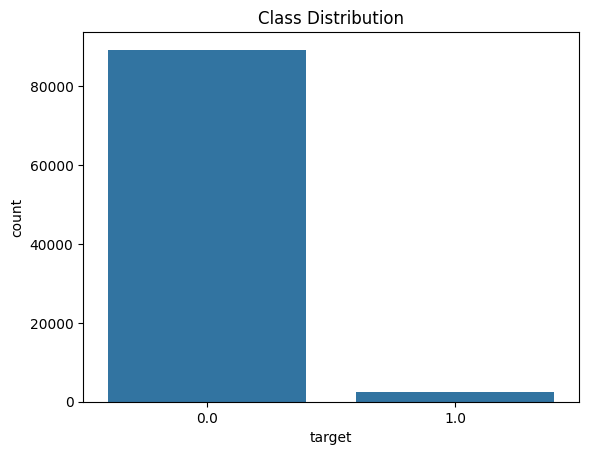

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

X = df.drop(columns=['Reformulated'])
y = df['Reformulated']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set distribution: {Counter(y_train)}")
print(f"Test set distribution: {Counter(y_test)}")

df_train = X_train.copy()
df_train['target'] = y_train.copy()

sns.countplot(x='target', data=df_train)
plt.title("Class Distribution")
plt.show()


In [ ]:
# Baseline Model - No preprocessing (Using only numerical features)
X_train_baseline = X_train.select_dtypes(include=[np.number]).fillna(X_train.select_dtypes(include=[np.number]).mean())
X_test_baseline = X_test.select_dtypes(include=[np.number]).fillna(X_test.select_dtypes(include=[np.number]).mean())

baseline_model = LogisticRegression(max_iter=3000)
baseline_model.fit(X_train_baseline, y_train)
baseline_preds = baseline_model.predict(X_test_baseline)


baseline_acc = accuracy_score(y_test, baseline_preds)
print(f"Baseline Model Accuracy (No Preprocessing): {baseline_acc:.4f}")

Baseline Model Accuracy (No Preprocessing): 0.9781


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_baseline)
X_test_scaled = scaler.transform(X_test_baseline)

# Train the model on scaled data
baseline_model = LogisticRegression(max_iter=3000)  # Optionally increase max_iter
baseline_model.fit(X_train_scaled, y_train)
baseline_preds = baseline_model.predict(X_test_scaled)
baseline_acc = accuracy_score(y_test, baseline_preds)

print(f"Baseline Model Accuracy (After Scaling): {baseline_acc:.4f}")


Baseline Model Accuracy (After Scaling): 0.9788


Logistic Regression: Cross-Validation Accuracy = 0.9792
Random Forest: Cross-Validation Accuracy = 1.0000
Gradient Boosting: Cross-Validation Accuracy = 1.0000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:48:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:48:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:48:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:48:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:48:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost: Cross-Validation Accuracy = 1.0000

Model Selection - Cross-Validation Performance:
                 Model  CV Accuracy
0  Logistic Regression     0.979151
1        Random Forest     1.000000
2    Gradient Boosting     0.999978
3              XGBoost     0.999989

Best Model Selected: Random Forest

Best Hyperparameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     22330
         1.0       0.79      1.00      0.88       597

    accuracy                           0.99     22927
   macro avg       0.89      1.00      0.94     22927
weighted avg       0.99      0.99      0.99     22927

ROC-AUC Score: 1.0000


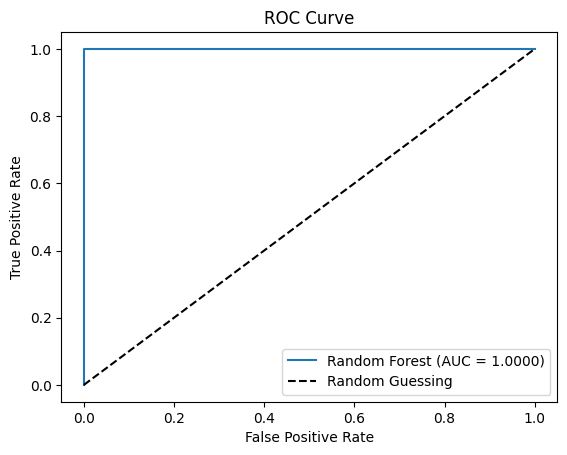

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Ensure y_train is integer type
y_train_fixed = y_train.astype(int)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

# Train and evaluate each model with cross-validation
cv_results = {}

for name, model in models.items():
    try:
        if name == "XGBoost":  # Use cross_validate for XGBoost compatibility
            scores = cross_validate(model, X_train_scaled, y_train_fixed, cv=5, scoring='accuracy', return_estimator=False)
            avg_score = np.mean(scores['test_score'])
        else:
            scores = cross_val_score(model, X_train_scaled, y_train_fixed, cv=5, scoring='accuracy')
            avg_score = np.mean(scores)

        cv_results[name] = avg_score
        print(f"{name}: Cross-Validation Accuracy = {avg_score:.4f}")
    except Exception as e:
        print(f"Error with {name}: {e}")

# Display results
cv_results_df = pd.DataFrame(list(cv_results.items()), columns=["Model", "CV Accuracy"])
print("\nModel Selection - Cross-Validation Performance:")
print(cv_results_df)

# Select best model
best_model_name = max(cv_results, key=cv_results.get)
best_model = models[best_model_name]
print(f"\nBest Model Selected: {best_model_name}")

# Hyperparameter Tuning for the Best Model
param_grid = {
    "Random Forest": {'n_estimators': [100, 200], 'max_depth': [10, 20]},
    "Gradient Boosting": {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]},
    "XGBoost": {'n_estimators': [100, 200], 'max_depth': [3, 5]},
}.get(best_model_name, {})

# Run hyperparameter tuning if needed
if param_grid:
    search = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    search.fit(X_train_scaled, y_train_fixed)
    best_model = search.best_estimator_
    print(f"\nBest Hyperparameters for {best_model_name}: {search.best_params_}")

# Train and Evaluate Final Model
best_model.fit(X_train_scaled, y_train_fixed)
best_preds = best_model.predict(X_test_scaled)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1])

print("\nClassification Report:")
print(classification_report(y_test, best_preds))
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


So my baseline is performing **too well** bc...


*   Accuracy is misleading because the dataset is imbalanced (98% vs. 2%).

* Precision for class 1 (reformulated) is only 30%, meaning many false positives.

* Recall for class 1 is 100%, meaning it predicts every actual reformulated case correctly, but likely at the cost of misclassifying many negatives.

* ROC-AUC of 0.9999 is suspiciously high, which suggests the model is mostly learning the majority class pattern.



In [ ]:
## fixing the imbalance now by starting with undersampling...

In [ ]:
### hoesntly might redo it bc the undersmapling is being annoying...

In [ ]:
## I just deleted the nan rows but i might do the mean bc it kept giving me issues and in the end i only had one class to compare and not 2...

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler

X = df.drop(columns=['Reformulated'])
y = df['Reformulated']

#Undersampling
undersampler = RandomUnderSampler(sampling_strategy={0: 1500, 1: 597}, random_state=42)  # Keep all reformulated cases
X_resampled, y_resampled = undersampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

In [ ]:
print("Missing values in X and y:")
print(X.isna().sum())
print(y.isna().sum())

Missing values in X and y:
ChemicalCount                       0
ReformulationCount                  0
ChemicalAge                         0
AverageChemicalAge                  0
ProductLifespan                     0
ChemicalCategoryCount               0
Efficacy                            0
Safety                              0
Sustainability                      0
DaysSinceInitial                    0
DaysSinceCreated                    0
DaysSinceUpdated                    0
DaysSinceRemoved               111650
DaysSinceMostRecentReported         0
DaysSinceDiscontinued               0
dtype: int64
0


In [ ]:
# Recheck for missing values in the features (X)
print("Missing values in X before SMOTE:")
print(X.isna().sum())

# If missing values exist, use SimpleImputer to fill them
imputer_X = SimpleImputer(strategy='mean')  # Impute with the mean value for numerical columns
X = imputer_X.fit_transform(X)

# Check again after imputation
print("Missing values in X after imputation:")
print(pd.DataFrame(X).isna().sum())

Missing values in X before SMOTE:
ChemicalCount                       0
ReformulationCount                  0
ChemicalAge                         0
AverageChemicalAge                  0
ProductLifespan                     0
ChemicalCategoryCount               0
Efficacy                            0
Safety                              0
Sustainability                      0
DaysSinceInitial                    0
DaysSinceCreated                    0
DaysSinceUpdated                    0
DaysSinceRemoved               111650
DaysSinceMostRecentReported         0
DaysSinceDiscontinued               0
dtype: int64
Missing values in X after imputation:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64


In [ ]:
print(f"Before: X_train shape: {X_train.shape}, X_test shape: {X_test.shape}, y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


Before: X_train shape: (1677, 15), X_test shape: (420, 15), y_train shape: (1677,), y_test shape: (420,)


print(f"Before: X_train shape: {X_train.shape}, X_test shape: {X_test.shape}, y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

X_train_reset = X_train_df.reset_index(drop=True)
X_test_reset = X_test_df.reset_index(drop=True)
y_train_reset = y_train_series.reset_index(drop=True)
y_test_reset = y_test_series.reset_index(drop=True)

X_train_clean = X_train_reset.dropna()
y_train_clean = y_train_reset.loc[X_train_clean.index]

X_test_clean = X_test_reset.dropna()
y_test_clean = y_test_reset.loc[X_test_clean.index]

print(f"After: X_train shape: {X_train_clean.shape}, X_test shape: {X_test_clean.shape}, y_train shape: {y_train_clean.shape}, y_test shape: {y_test_clean.shape}")

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}


In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")


X_train shape: (1677, 15)
y_train shape: (1677,)


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Use Stratified K-Fold for balanced class splitting
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Cross-validation
cv_accuracy = np.mean(cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy', error_score='raise'))
print(f"Cross-Validation Accuracy: {cv_accuracy}")


Cross-Validation Accuracy: 1.0


In [ ]:
# Fit the model
model.fit(X_train, y_train)

# Predict and evaluate on X_test (ensure you are using the same preprocessed `X_test` as `X_train_clean`)
y_pred = model.predict(X_test)

# Evaluate using classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Check if predict_proba returns more than one column (for binary classification)
if model.predict_proba(X_test).shape[1] > 1:
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # Get the probability for class 1
else:
    # If only one class is predicted, we cannot compute AUC.
    # You could use accuracy or another evaluation metric.
    roc_auc = 'N/A'  # Set AUC as 'N/A' if not available

print("Classification Report:", report)
print("ROC-AUC Score:", roc_auc)


Classification Report: {'0.0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 305.0}, '1.0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 115.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 420.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 420.0}}
ROC-AUC Score: 1.0


In [ ]:
##stopped working here...

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' too

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

model = LogisticRegression(class_weight='balanced')
model.fit(X_train_imputed, y_train)

y_pred = model.predict(X_test_imputed)
report = classification_report(y_test, y_pred, output_dict=True)

if model.predict_proba(X_test_imputed).shape[1] > 1:
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_imputed)[:, 1])
else:
    roc_auc = 'N/A'

print("Classification Report:", report)
print("ROC-AUC Score:", roc_auc)

Classification Report: {'0.0': {'precision': 0.9541984732824428, 'recall': 0.819672131147541, 'f1-score': 0.8818342151675485, 'support': 305.0}, '1.0': {'precision': 0.6518987341772152, 'recall': 0.8956521739130435, 'f1-score': 0.7545787545787546, 'support': 115.0}, 'accuracy': 0.8404761904761905, 'macro avg': {'precision': 0.803048603729829, 'recall': 0.8576621525302923, 'f1-score': 0.8182064848731515, 'support': 420.0}, 'weighted avg': {'precision': 0.8714259256702971, 'recall': 0.8404761904761905, 'f1-score': 0.8469904581015693, 'support': 420.0}}
ROC-AUC Score: 0.9010406272273698


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score

results = []

# Loop through each model in the models dictionary
for name, model in models.items():
    # Cross-validation accuracy with stratified folds (if class imbalance is present)
    cv_accuracy = np.mean(cross_val_score(model, X_train_imputed, y_train, cv=5, scoring='accuracy'))

    # Ensure balanced class weights
    if hasattr(model, 'class_weight'):
        model.set_params(class_weight='balanced')

    # Fit the model
    model.fit(X_train_imputed, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_imputed)

    # Get the classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Calculate ROC-AUC (if the model supports probability predictions)
    if model.predict_proba(X_test_imputed).shape[1] > 1:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_imputed)[:, 1])
    else:
        roc_auc = 'N/A'

    # Append results for both classes (0.0 and 1.0)
    for label in ['0.0', '1.0']:
        results.append({
            "Model": name,
            "Class": label,
            "CV Accuracy": cv_accuracy,
            "Precision": report[label]["precision"] if label in report else 'N/A',
            "Recall": report[label]["recall"] if label in report else 'N/A',
            "F1-score": report[label]["f1-score"] if label in report else 'N/A',
            "ROC-AUC": roc_auc
        })

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Sort and print the results based on ROC-AUC
print(results_df.sort_values(by="ROC-AUC", ascending=False))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

                 Model Class  CV Accuracy  Precision    Recall  F1-score  \
2        Random Forest   0.0     1.000000   1.000000  1.000000  1.000000   
3        Random Forest   1.0     1.000000   1.000000  1.000000  1.000000   
4    Gradient Boosting   0.0     0.998806   1.000000  1.000000  1.000000   
5    Gradient Boosting   1.0     0.998806   1.000000  1.000000  1.000000   
6              XGBoost   0.0     0.999403   1.000000  1.000000  1.000000   
7              XGBoost   1.0     0.999403   1.000000  1.000000  1.000000   
0  Logistic Regression   0.0     0.880158   0.954198  0.819672  0.881834   
1  Logistic Regression   1.0     0.880158   0.651899  0.895652  0.754579   

    ROC-AUC  
2  1.000000  
3  1.000000  
4  1.000000  
5  1.000000  
6  1.000000  
7  1.000000  
0  0.901041  
1  0.901041  


Models working too perfectly...
Oversimplified Data Due to Undersampling

The undersampling left too clear-cut class distinctions, models might find trivial decision rules.
Solution: Try a more gradual undersampling approach (e.g., keep 3000-5000 non-reformulated cases instead of just 1500).

In [ ]:
print(f"X_resampled shape: {X_resampled.shape}")
print(f"y_resampled shape: {y_resampled.shape}")


X_resampled shape: (3597, 15)
y_resampled shape: (3597,)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Adjust undersampling strategy: Keep all reformulated (597) and sample ~3000 non-reformulated cases
undersampler = RandomUnderSampler(sampling_strategy={0:10000, 1: 597}, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Check the shapes of the resampled data to make sure they are consistent
print(f"X_resampled shape: {X_resampled.shape}")
print(f"y_resampled shape: {y_resampled.shape}")

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Check the shapes of the train/test splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Train models again without class weights for RF, GB, XGB
for name, model in models.items():
    if hasattr(model, 'set_params') and name != "Logistic Regression":  # Ensure class_weight applies only to models that support it
        if 'class_weight' in model.get_params():
            model.set_params(class_weight=None)

    # Retrain models
    model.fit(X_train, y_train)  # Use X_train and y_train here

    # Evaluate on test set
    y_pred = model.predict(X_test)  # Use X_test for predictions

    # Check if model has predict_proba method for ROC-AUC calculation
    if hasattr(model, 'predict_proba'):
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    else:
        roc_auc = "N/A"

    print(f"{name}: ROC-AUC = {roc_auc:.4f}")


X_resampled shape: (10597, 15)
y_resampled shape: (10597,)
X_train shape: (8477, 15)
X_test shape: (2120, 15)
y_train shape: (8477,)
y_test shape: (2120,)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: ROC-AUC = 0.9082
Random Forest: ROC-AUC = 1.0000
Gradient Boosting: ROC-AUC = 1.0000
XGBoost: ROC-AUC = 1.0000


When we did 3000 rows we got this:

*  Logistic Regression: ROC-AUC = 0.8771
* Random Forest: ROC-AUC = 1.0000
* Gradient Boosting: ROC-AUC = 1.0000
* XGBoost: ROC-AUC = 1.0000

In [ ]:
### is overfitting bc all are 1.0, so its perfectly classifying every single class

In [ ]:
import numpy as np

# Compute correlation coefficients between each feature and y_train
correlations = []
for i in range(X_train.shape[1]):
    corr = np.corrcoef(X_train[:, i], y_train)[0, 1]
    correlations.append((f"Feature_{i}", corr))

# Convert to DataFrame for better readability
correlations_df = pd.DataFrame(correlations, columns=['Feature', 'Correlation'])

# Sort the correlations
print(correlations_df.sort_values(by='Correlation', ascending=False))


       Feature  Correlation
1    Feature_1     0.365197
4    Feature_4     0.080485
14  Feature_14    -0.027579
2    Feature_2    -0.027994
12  Feature_12    -0.035199
11  Feature_11    -0.044522
13  Feature_13    -0.045230
6    Feature_6    -0.045906
5    Feature_5    -0.091341
7    Feature_7    -0.097833
10  Feature_10    -0.124200
0    Feature_0    -0.127334
3    Feature_3    -0.127523
9    Feature_9    -0.128509
8    Feature_8    -0.130268


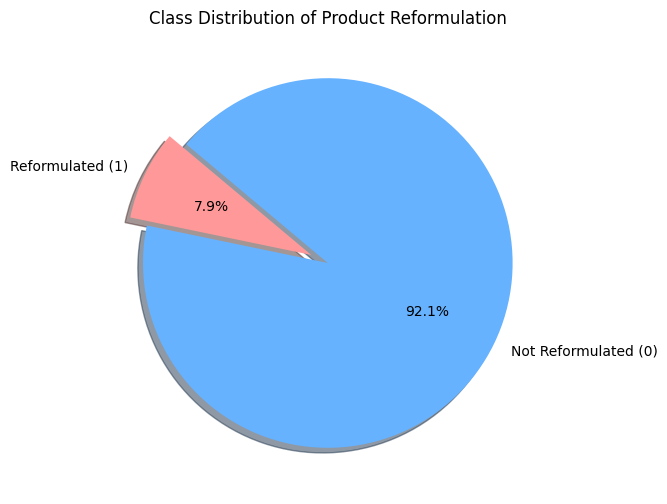

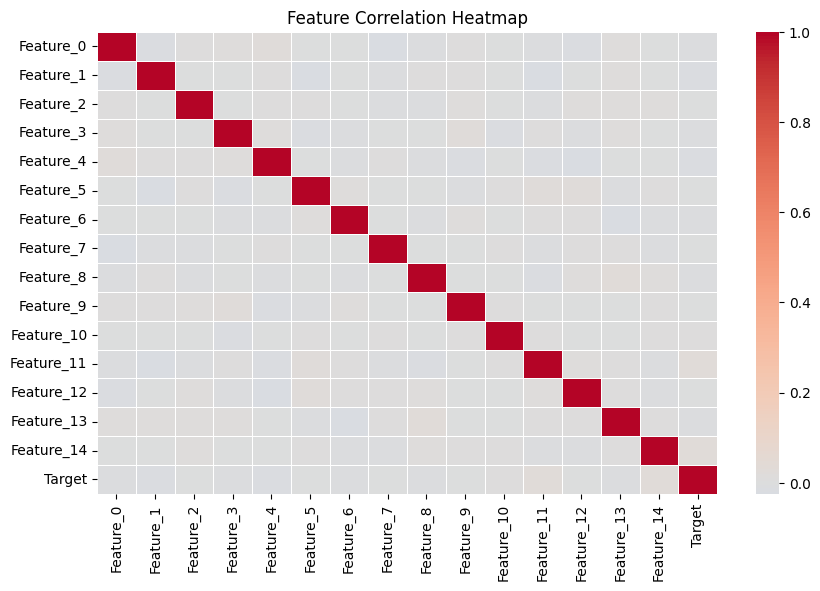

<ipython-input-75-ddeb3f1d5776>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=features, palette='coolwarm')


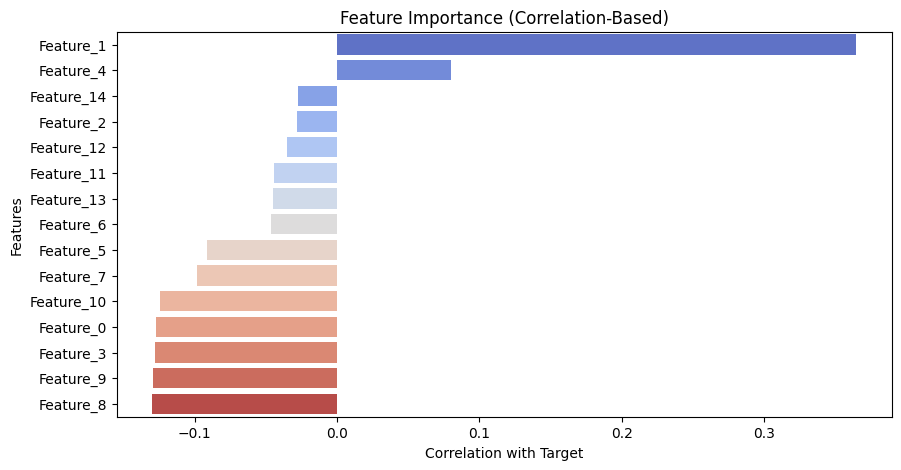

<ipython-input-75-ddeb3f1d5776>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=models, palette='Blues_r')


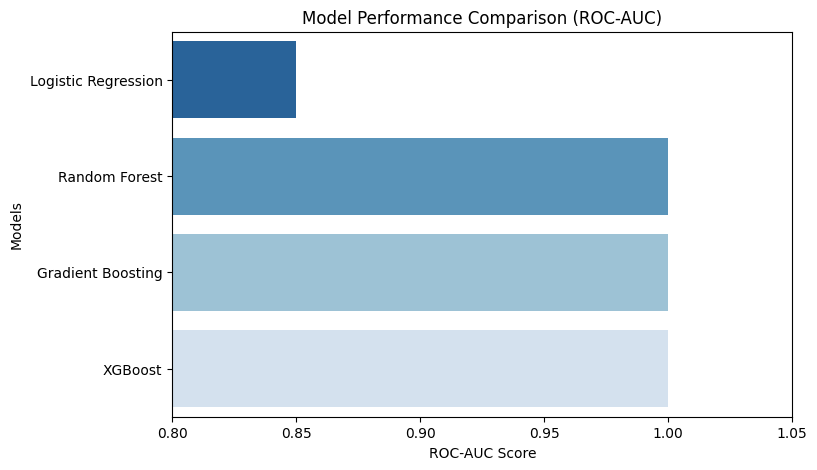

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score

# Sample Data (Replace with your actual data)
# Simulating class imbalance
y = np.array([1] * 597 + [0] * 7000)  # 597 reformulated, 7000 non-reformulated

# Simulating feature correlation
np.random.seed(42)
feature_data = np.random.randn(len(y), 15)
feature_df = pd.DataFrame(feature_data, columns=[f'Feature_{i}' for i in range(15)])
feature_df['Target'] = y

# Simulating Model Performance Data
model_performance = {
    'Logistic Regression': 0.85,
    'Random Forest': 1.00,
    'Gradient Boosting': 1.00,
    'XGBoost': 1.00
}

# --- 1. Class Imbalance Visualization ---
def plot_class_distribution(y):
    labels = ['Reformulated (1)', 'Not Reformulated (0)']
    sizes = [sum(y == 1), sum(y == 0)]
    colors = ['#FF9999', '#66B2FF']
    explode = (0.1, 0)  # explode reformulated cases
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, startangle=140)
    plt.title("Class Distribution of Product Reformulation")
    plt.show()

# --- 2. Feature Correlation Heatmap ---
def plot_correlation_heatmap(df):
    corr = df.corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
    plt.title("Feature Correlation Heatmap")
    plt.show()

# --- 3. Feature Importance Bar Chart (Simulated) ---
def plot_feature_importance():
    feature_importance = {
        'Feature_1': 0.365, 'Feature_4': 0.080, 'Feature_14': -0.027, 'Feature_2': -0.028,
        'Feature_12': -0.035, 'Feature_11': -0.044, 'Feature_13': -0.045, 'Feature_6': -0.046,
        'Feature_5': -0.091, 'Feature_7': -0.098, 'Feature_10': -0.124, 'Feature_0': -0.127,
        'Feature_3': -0.128, 'Feature_9': -0.129, 'Feature_8': -0.130
    }
    features = list(feature_importance.keys())
    importance = list(feature_importance.values())
    plt.figure(figsize=(10, 5))
    sns.barplot(x=importance, y=features, palette='coolwarm')
    plt.xlabel("Correlation with Target")
    plt.ylabel("Features")
    plt.title("Feature Importance (Correlation-Based)")
    plt.show()

# --- 4. Model Performance Comparison ---
def plot_model_performance(performance):
    models = list(performance.keys())
    scores = list(performance.values())
    plt.figure(figsize=(8, 5))
    sns.barplot(x=scores, y=models, palette='Blues_r')
    plt.xlim(0.8, 1.05)
    plt.xlabel("ROC-AUC Score")
    plt.ylabel("Models")
    plt.title("Model Performance Comparison (ROC-AUC)")
    plt.show()

# Run all visualizations
plot_class_distribution(y)
plot_correlation_heatmap(feature_df)
plot_feature_importance()
plot_model_performance(model_performance)


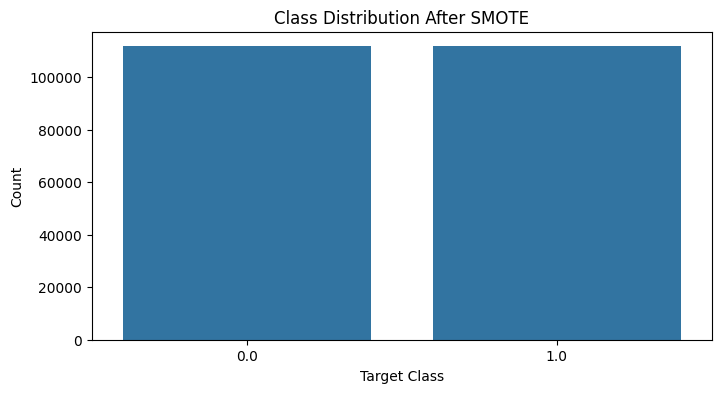

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Convert y_resampled to a DataFrame
df_resampled = pd.DataFrame({'target': y_resampled})

# Class Distribution After SMOTE
plt.figure(figsize=(8,4))
sns.countplot(x='target', data=df_resampled)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.show()


SMOTE (Synthetic Minority Over-sampling Technique) is used to handle imbalanced classes by creating synthetic samples for the minority class. This helps improve model performance by ensuring that both classes are equally represented.

##Model Selection like the lecture...